#### REDI ML: PROJECT ONE
##### Part One: "Project-based North American pumpkin prices"

So if you have ever lived in the North America, you know Pumpkins are a big deal, especially during autumn. From pumpkin pie, to pumpkin soups to pumpkin spice latte. 

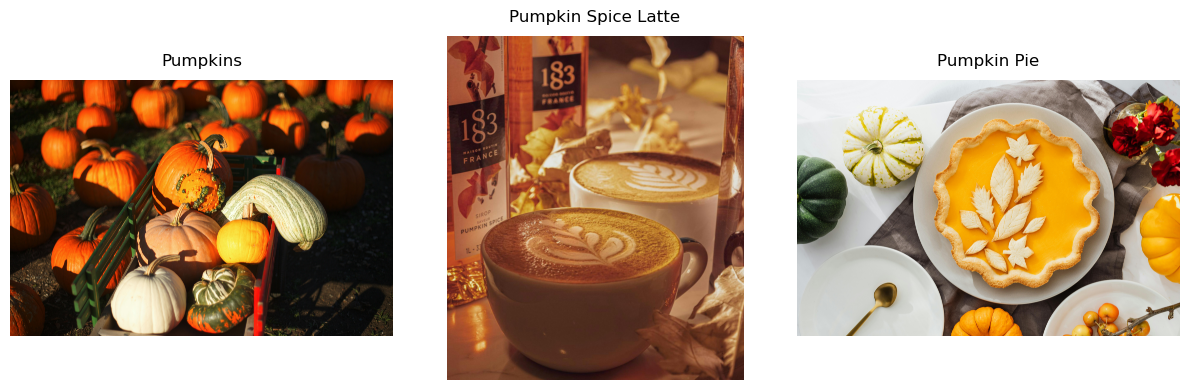

In [3]:
# from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image


img1 = Image.open("pumpkins.jpg")
img2 = Image.open("pumpkin_spice_latte.jpg")
img3 = Image.open("pumpkin_pie.jpg")

# Create a list of images and their labels
images = [img1, img2, img3]
labels = ['Pumpkins', 'Pumpkin Spice Latte', 'Pumpkin Pie']

# Create the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

for ax, img, label in zip(axs, images, labels):
    ax.imshow(img)
    ax.set_title(label, fontsize=12, pad=10)
    
    # Remove axis ticks
    ax.axis('off')

# Adjust spacing
plt.tight_layout()
plt.show()

# display(img)

In [4]:
import pandas as pd
import numpy as np
import os 

cwd = os.getcwd()
print(cwd)

C:\Users\mercy\REDI_ML_PROJECT


In [5]:
# to get data from Github
# url = "https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv"
# download = requests.get(url).content

#### IMPORT DATA

In [7]:
pumpkins = pd.read_csv("C:/Users/mercy/REDI_ML_PROJECT/data/US-pumpkins.csv", encoding = 'utf-8')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
# print column names
print(f"Column Names: \n{pumpkins.columns}")
print(f"\nThere are {pumpkins.shape[0]} observations and {pumpkins.shape[1]} columns in the US_Pumpkins Dataset.")
# pumpkins.shape()

Column Names: 
Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

There are 1757 observations and 26 columns in the US_Pumpkins Dataset.


In [9]:
# edit some column names
pumpkins.columns = pumpkins.columns.str.replace(' ', '_')

In [10]:
# general information about the dataset
print(f"Numerical Variable Description: \n \n {pumpkins.describe().transpose()}")
print(f"Catergorical Variable Description: \n \n {pumpkins.describe(include = "object").transpose()}")

Numerical Variable Description: 
 
               count        mean        std   min     25%    50%    75%    max
Grade           0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Low_Price    1757.0  124.571338  83.876591  0.24  24.000  140.0  180.0  480.0
High_Price   1757.0  132.970939  89.524958  0.24  24.500  150.0  200.0  480.0
Mostly_Low   1654.0  128.170550  86.512161  0.24  24.625  147.0  185.0  480.0
Mostly_High  1654.0  132.491802  88.442967  0.24  26.125  150.0  200.0  480.0
Environment     0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Quality         0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Condition       0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Appearance      0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Storage         0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Crop            0.0         NaN        NaN   NaN     NaN    NaN    NaN    NaN
Trans_Mode      0.0         

In [11]:
# check for missing data
pumpkins.isnull().sum()

City_Name             0
Type               1712
Package               0
Variety               5
Sub_Variety        1461
Grade              1757
Date                  0
Low_Price             0
High_Price            0
Mostly_Low          103
Mostly_High         103
Origin                3
Origin_District    1626
Item_Size           279
Color               616
Environment        1757
Unit_of_Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans_Mode         1757
Unnamed:_24        1757
Unnamed:_25        1654
dtype: int64

<Axes: >

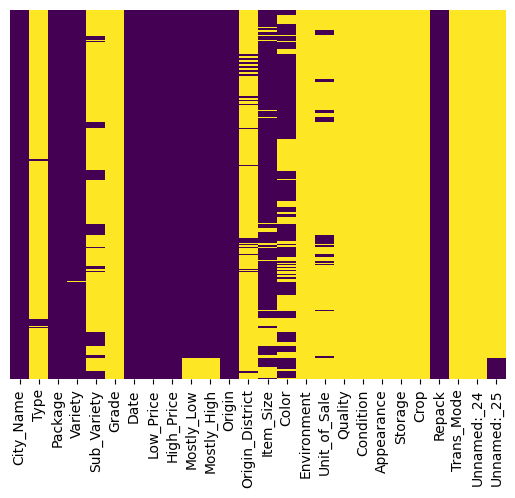

In [12]:
# visualization of the dataset 
import seaborn as sns

sns.heatmap(pumpkins.isnull(), yticklabels=False, cbar=False, cmap='viridis') # yellow = null values

> So, we observe that nine columns have absolutely no information (all missing). This can be examined using the .describe() method, which provides information on all the NAs and the sum of missing values. Missing values are also visually represented above (really nice if you are a visual learner like me), where certain variables are highlighted with completely yellow blocks.

> Based on the information obtained during data exploration, we will subset the pumpkins dataset to contain the following columns: City_Name, Package, Variety, Mostly_High, Mostly_Low, Item_Size, Repack, Color, Date, High_Price & Low_Price.

In [14]:
# subset pumpkins dataset
pumpkins = pd.DataFrame.from_dict(
    {'City': pumpkins['City_Name'], 
     'Package': pumpkins['Package'], 
     'Variety': pumpkins['Variety'], 
     'Mostly_High': pumpkins['Mostly_High'],
     'Mostly_Low': pumpkins['Mostly_Low'],
     'Item_Size': pumpkins['Item_Size'], 
     'Repack': pumpkins['Repack'], 
     'Color': pumpkins['Color'],
     'Date': pumpkins['Date'], 
     'Low_Price': pumpkins['Low_Price'],
     'High_Price': pumpkins['High_Price']})
pumpkins.head()

,City,Package,Variety,Mostly_High,Mostly_Low,Item_Size,Repack,Color,Date,Low_Price,High_Price
0,BALTIMORE,24 inch bins,NaN,280.0,270.0,lge,E,NaN,4/29/17,270.0,280.0
1,BALTIMORE,24 inch bins,NaN,280.0,270.0,lge,E,NaN,5/6/17,270.0,280.0
2,BALTIMORE,24 inch bins,HOWDEN TYPE,160.0,160.0,med,N,ORANGE,9/24/16,160.0,160.0
3,BALTIMORE,24 inch bins,HOWDEN TYPE,160.0,160.0,med,N,ORANGE,9/24/16,160.0,160.0
4,BALTIMORE,24 inch bins,HOWDEN TYPE,100.0,90.0,lge,N,ORANGE,11/5/16,90.0,100.0


#### DATA PREPROCESSING I

📝 `Data Preprocessing Tasks:`
- Modify 'Date' column and create 'Month' & 'DayofYear' columns 
- Filter 'Package' to include just bushels
- Calculate average price ('Avg_Price') from 'Low_Price' & 'High_Price'
- Final dataset (new_pumpkins): 
    - Month, DayOfYear, Variety, City, Package, Item_Size, Repack, Color, Avg_Price
 
🎯`Project Goal:`
- Predict average pumpkin prices using available information (variables in new_pumpkins)
- Models:
    - linear regression
    - polynomial regression
    - logistics regression
    - random forest 

In [17]:
from datetime import datetime

# get month detail from date
month = pd.DatetimeIndex(pumpkins['Date']).month
print(f"Months: {month}\n")
pumpkins['Month'] = month

day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt - datetime(dt.year,1,1)).days)
print(f"Days of the year: \n{day_of_year}")
pumpkins['DayOfYear'] = day_of_year

# could use format = pd.to_datetime(df['Date'], format='%Y-%m-%d') but dataset is small, and just in case the Date is actually inconsistent will allow the elements to be parsed individually 

Months: Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)

Days of the year: 
0       118
1       125
2       267
3       267
4       309
       ... 
1752    273
1753    269
1754    270
1755    271
1756    272
Name: Date, Length: 1757, dtype: int64


C:\Users\mercy\AppData\Local\Temp\ipykernel_53616\4002965296.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt - datetime(dt.year,1,1)).days)


In [18]:
# calculate average pumpkin prices
avg_price = (pumpkins['Low_Price'] + pumpkins['High_Price']) / 2
print(avg_price)
pumpkins['Avg_Price'] = avg_price

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64


> In this analysis, we want to focus on the pumpkins package. Since pumpkins package is recorded in different units, we will filtered the dataset to focus just on the 'bushel' unit.

In [20]:
# filter dataset so that package only contain 'bushel' (includes crates & baskets)
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [21]:
pumpkins.Package.unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [22]:
#for package -> brushels is for 1 1/9 or for 1/2, need to standardize prices to be per 1 bushel
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Avg_Price'] = avg_price / (1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Avg_Price'] = avg_price / (1/2)

In [23]:
pumpkins.Package.unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [24]:
pumpkins.head()

,City,Package,Variety,Mostly_High,Mostly_Low,Item_Size,Repack,Color,Date,Low_Price,High_Price,Month,DayOfYear,Avg_Price
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,med,N,ORANGE,9/24/16,15.0,15.0,9,267,13.5
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,sml,N,ORANGE,9/24/16,18.0,18.0,9,267,16.2
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,sml,N,ORANGE,10/1/16,18.0,18.0,10,274,16.2
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,17.0,17.0,med,N,ORANGE,10/1/16,17.0,17.0,10,274,15.3
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,NaN,N,ORANGE,10/8/16,15.0,15.0,10,281,13.5


In [25]:
pumpkins.isnull().sum()

City             0
Package          0
Variety          0
Mostly_High     24
Mostly_Low      24
Item_Size      114
Repack           0
Color          145
Date             0
Low_Price        0
High_Price       0
Month            0
DayOfYear        0
Avg_Price        0
dtype: int64

In [34]:
# subset pumpkins dataset
new_pumpkins = pd.DataFrame.from_dict(
    {'Month': pumpkins['Month'],
     'DayOfYear': pumpkins['DayOfYear'],
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City'], 
     'Package': pumpkins['Package'], 
     'Item_Size': pumpkins['Item_Size'],
     'Repack': pumpkins['Repack'],
     'Color': pumpkins['Color'],
     'Avg_Price': pumpkins['Avg_Price']})
new_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Item_Size,Repack,Color,Avg_Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,med,N,ORANGE,13.5
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,sml,N,ORANGE,16.2
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,sml,N,ORANGE,16.2
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,med,N,ORANGE,15.3
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,NaN,N,ORANGE,13.5


In [36]:
# check for missing data - double checking never hurts
new_pumpkins.isnull().sum()

Month          0
DayOfYear      0
Variety        0
City           0
Package        0
Item_Size    114
Repack         0
Color        145
Avg_Price      0
dtype: int64

#### VISUALIZATION

In [38]:
import matplotlib.pyplot as plt

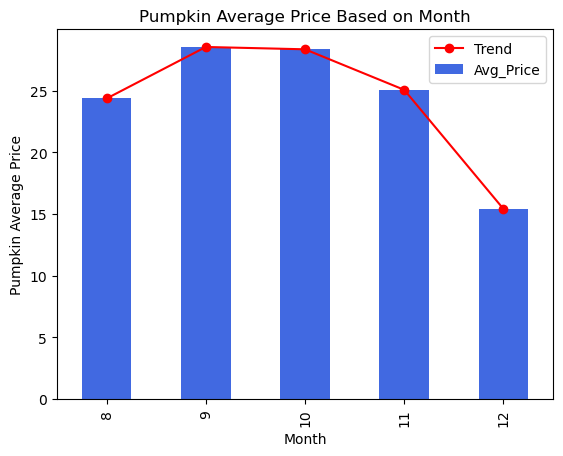

In [52]:
# Average price of pumpkins grouped by Months 
monthly_avg = new_pumpkins.groupby(['Month'])['Avg_Price'].mean()
monthly_avg.plot(kind='bar', color='royalblue')
plt.plot(range(len(monthly_avg)), monthly_avg, color='red', marker='o', label='Trend')

plt.ylabel("Pumpkin Average Price")
plt.title("Pumpkin Average Price Based on Month")
plt.legend()

Text(0.5, 1.0, 'Pumpkin Price Based on Pumpkin Variety')

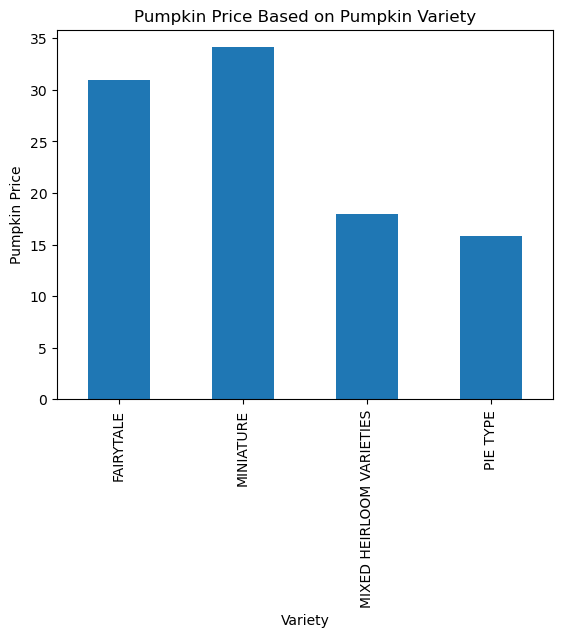

In [44]:
# Average price of pumpkins grouped by Months 
new_pumpkins.groupby(['Variety'])['Avg_Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
plt.title("Pumpkin Price Based on Pumpkin Variety")

> From the bar chart, pumpkins prices start to rise in the 8th (August) month which is the end of summer and remains high in the 9th and 10th month (September and October), and starts to drop in the 11th month (November). We clearly see the rise and fall in the prices more likely in the line graph.

In [ ]:
# what about packages / type, does this play a role
sns.displot(new_pumpkins, x="Month", hue="Package", kind="kde") # kernel density estimate

#### LINEAR REGRESSION 


In [ ]:
# correlation matrix
    # interested in average price, packages, months and day of the year
pumpkinsprice_corr = new_pumpkins.corr(method = 'spearman', numeric_only=True)
pumpkinsprice_corr

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pumpkinsprice_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

> Average price of pumpkins has greater correlation with Day of Year compared to Months so we stick to comparing DayOfYear with Avg_Price.

In [ ]:
# dropping missing values before Linear Regression (if there were missings)
new_pumpkins.dropna(inplace=True) # meaning of output message
new_pumpkins.info()

    # already checked for missing

In [ ]:
#### Simple Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# reshape needed cause LR uses 2D-array as an input??
# we only have one input so we need array with shape Nx1 (N = dataset size)
X = new_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = new_pumpkins['Avg_Price']

In [ ]:
# define a linear model
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    print(f'Linear coefficient: {lin_reg.coef_} \n Intercept: {lin_reg.intercept_}')
    
    pred = lin_reg.predict(X_test)
    
    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
    
    score = lin_reg.score(X_train,y_train)
    print("Model's coefficient of determination: ", score)

    return X_test, y_test, pred, lin_reg
    
X_test, y_test, pred, lin_reg = run_linear_regression(X,y)

> An R2 of 0.02 is quite low, indicating that a linear model is not able to explain the relationship between 'DayOfYear' and 'Avg_Price.'

In [ ]:
# plot regression line
plt.scatter(X_test, y_test)
plt.plot(X_test,pred)
plt.xlabel("DayOfYear")
plt.ylabel("Avg_Price")

#### POLYNOMIAL REGRESSION

As seen above, a linear regression is a bad choice of predicting pumpkins prices, and this is logical as prices tend to fluctuate.

In [ ]:
# pipeline - first, adds polynomial features to model, then trains regression
def run_linear_regression_poly_features(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
    pipeline.fit(X_train,y_train)
    print(pipeline, "\n")
    
    print("Coefficient:", pipeline[1].coef_)
    print("Intercept:", pipeline[1].intercept_)

    # prediction 
    poly_pred = pipeline.predict(X_test)
    
    # calculate determination and MSE 
    score = pipeline.score(X_train, y_train)
    print("Model's coefficient of determination: ", score)
    
    mse = np.sqrt(mean_squared_error(y_test, poly_pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(poly_pred)*100:3.3}%)')

    plt.scatter(X_test,y_test)
    plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))

    return X_test, y_test, pred
    
X_test, y_test, pred = run_linear_regression_poly_features(X, y)


> Mathematically, this translates to: y=−0.0035x^2 + 1.94x − 241.39.

In [ ]:
def model_output_sum(X_test, y_test, pred):
    summary = {
        "X_test shape": X_test.shape,        
        "y_test shape": y_test.shape,        
        "First 5 predictions": pred[:5] 
    }
    return summary

output_summary = model_output_sum(X_test, y_test, pred)
print(output_summary)

In [ ]:
X.head()


> Before training another linear regression, I would like to examine if there are any correlations between Avg_Price and the one-hot encoded variables.

##### One-Hot Encoding
> Converting categorical variables into nominal variables.
> Supposing we had categorical variables with a specific order, we might use Label Encoding instead.

In [ ]:
# some interesting categorical variables
    # Variety, City_Name, and Packages are some interesting variables 

# convert categorical variable into numeric form, can use one hot encoding 
numeric_pumpkins = pd.get_dummies(new_pumpkins['Variety']) \
                    .join(new_pumpkins['Month']) \
                    .join(new_pumpkins['DayOfYear']) \
                    .join(new_pumpkins['Avg_Price']) \
                    .join(pd.get_dummies(new_pumpkins['City'])) \
                    .join(pd.get_dummies(new_pumpkins['Package']))

pd.get_dummies(numeric_pumpkins, dtype=int)

In [ ]:
# correlation matrix
    # interested in average price, packages, months and day of the year
encodepumpkins_corr = numeric_pumpkins.corr(method = 'spearman', numeric_only=True)
encodepumpkins_corr

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(encodepumpkins_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

> From the correlation matrix, we see that barely any city correlates with Avg_Price. In this case, one would expect that a regression, particularly a linear regression, would perform badly in predicting average pumpkin prices based on the city name. For the variety variables, only Miniature and Pie Type are correlated with Avg_Price. For the Package variable, one can also observe that 1 1/9 bushel cartons and 1/2 bushel cartons are highly correlated with Avg_Price.

> To summarize, here are some hypotheses:
> 1. City_Name will be a poor predictor of Avg_Price.
> 2. Variety might be a better predictor for Avg_Price (i.e. Pie Type or Miniature).
> 3. Package might also be a better predictor for Avg_Price (i.e. 1 1/9 bushel cartons or 1/2 
     bushel cartons).

In [ ]:
numeric_pumpkins.columns

In [ ]:
# testing hypothesis
X = numeric_pumpkins.drop(columns=['Avg_Price']) 
y = numeric_pumpkins['Avg_Price']
    
X_test, y_test, pred, lin_reg = run_linear_regression(X,y)

print("X_test shape:", X_test.shape)        
print("y_test shape:", y_test.shape)        
print("First 5 predictions:", pred[:5])     
print("Model coefficients:", lin_reg.coef_)

In [ ]:
# testing hypothesis
X = numeric_pumpkins.drop(columns=['Avg_Price', 'PIE TYPE', 'MINIATURE', '1 1/9 bushel cartons', '1/2 bushel cartons']) 
y = numeric_pumpkins['Avg_Price']
    
X_test, y_test, pred, lin_reg = run_linear_regression(X,y)

print("X_test shape:", X_test.shape)        
print("y_test shape:", y_test.shape)        
print("First 5 predictions:", pred[:5])     
print("Model coefficients:", lin_reg.coef_)

In [ ]:
# testing hypothesis
X = numeric_pumpkins.drop(columns=['Avg_Price', 'PIE TYPE', '1/2 bushel cartons']) 
y = numeric_pumpkins['Avg_Price']
    
X_test, y_test, pred, lin_reg = run_linear_regression(X,y)

print("X_test shape:", X_test.shape)        
print("y_test shape:", y_test.shape)        
print("First 5 predictions:", pred[:5])     
print("Model coefficients:", lin_reg.coef_)

> As hypothesized:
> - Package, '1 1/9 bushel cartons' or '1/2 bushel cartons' and Variety, 'Pie Type' or 
    'Miniature' are the two most important predictors of Avg_Price, when modeled by a linear 
     regression. 

#### LOGISTIC REGRESSION 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# view data
numeric_pumpkins.head()

In [ ]:
def run_log_reg(X,y):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(classification_report(y_test, pred))
    print("Predicted Labels: ", pred)
    print("F1-score: ", f1_score(y_test, pred))

    return X_test, y_test, pred, lin_reg

X_test, y_test, pred = log_reg(X,y) 

In [ ]:
X = numeric_pumpkins.drop(columns=['Avg_Price', 'PIE TYPE', '1/2 bushel cartons']) 
y = numeric_pumpkins['Avg_Price']
    
X_test, y_test, pred, lin_reg = run_log_reg(X,y)

print("X_test shape:", X_test.shape)        
print("y_test shape:", y_test.shape)        
print("First 5 predictions:", pred[:5])    

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test, pred)

##### AUCROC

In [ ]:
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0,1], [0,1], "k==")
plt.plot(fpr, tpr)
plt.plot("False Positive Rate")
plt.plot("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_score[:,1])
print(auc)

#### RANDOM FOREST